In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# تنظیم استایل برای زیبایی نمودار
sns.set_style("whitegrid")

# بارگذاری داده‌ها
penguins = pd.read_csv("C:/Users/A.S.T.co/Downloads/penguins.csv")
print(penguins)


    studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgerse

In [2]:
columns = ["Flipper Length (mm)", "Body Mass (g)", "Species"]
penguins_non_missing = penguins[columns].dropna()  # حذف مقادیر گمشده

penguins_non_missing


,Flipper Length (mm),Body Mass (g),Species
0,181.0,3750.0,Adelie Penguin (Pygoscelis adeliae)
1,186.0,3800.0,Adelie Penguin (Pygoscelis adeliae)
2,195.0,3250.0,Adelie Penguin (Pygoscelis adeliae)
4,193.0,3450.0,Adelie Penguin (Pygoscelis adeliae)
5,190.0,3650.0,Adelie Penguin (Pygoscelis adeliae)
...,...,...,...
339,207.0,4000.0,Chinstrap penguin (Pygoscelis antarctica)
340,202.0,3400.0,Chinstrap penguin (Pygoscelis antarctica)
341,193.0,3775.0,Chinstrap penguin (Pygoscelis antarctica)
342,210.0,4100.0,Chinstrap penguin (Pygoscelis antarctica)


In [3]:
# تعریف X و y برای مدل رگرسیون
X = penguins_non_missing[["Flipper Length (mm)"]].values  # متغیر مستقل
y = penguins_non_missing["Body Mass (g)"].values          # متغیر وابسته
print(X)
print(y)


[[181.]
 [186.]
 [195.]
 [193.]
 [190.]
 [181.]
 [195.]
 [193.]
 [190.]
 [186.]
 [180.]
 [182.]
 [191.]
 [198.]
 [185.]
 [195.]
 [197.]
 [184.]
 [194.]
 [174.]
 [180.]
 [189.]
 [185.]
 [180.]
 [187.]
 [183.]
 [187.]
 [172.]
 [180.]
 [178.]
 [178.]
 [188.]
 [184.]
 [195.]
 [196.]
 [190.]
 [180.]
 [181.]
 [184.]
 [182.]
 [195.]
 [186.]
 [196.]
 [185.]
 [190.]
 [182.]
 [179.]
 [190.]
 [191.]
 [186.]
 [188.]
 [190.]
 [200.]
 [187.]
 [191.]
 [186.]
 [193.]
 [181.]
 [194.]
 [185.]
 [195.]
 [185.]
 [192.]
 [184.]
 [192.]
 [195.]
 [188.]
 [190.]
 [198.]
 [190.]
 [190.]
 [196.]
 [197.]
 [190.]
 [195.]
 [191.]
 [184.]
 [187.]
 [195.]
 [189.]
 [196.]
 [187.]
 [193.]
 [191.]
 [194.]
 [190.]
 [189.]
 [189.]
 [190.]
 [202.]
 [205.]
 [185.]
 [186.]
 [187.]
 [208.]
 [190.]
 [196.]
 [178.]
 [192.]
 [192.]
 [203.]
 [183.]
 [190.]
 [193.]
 [184.]
 [199.]
 [190.]
 [181.]
 [197.]
 [198.]
 [191.]
 [193.]
 [197.]
 [191.]
 [196.]
 [188.]
 [199.]
 [189.]
 [189.]
 [187.]
 [198.]
 [176.]
 [202.]
 [186.]
 [199.]


In [4]:
# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.41834665],
       [-1.06225022],
       [-0.42127665],
       [-0.56371522],
       [-0.77737308],
       [-1.41834665],
       [-0.42127665],
       [-0.56371522],
       [-0.77737308],
       [-1.06225022],
       [-1.48956593],
       [-1.34712736],
       [-0.70615379],
       [-0.20761879],
       [-1.13346951],
       [-0.42127665],
       [-0.27883808],
       [-1.20468879],
       [-0.49249594],
       [-1.91688165],
       [-1.48956593],
       [-0.84859236],
       [-1.13346951],
       [-1.48956593],
       [-0.99103094],
       [-1.27590808],
       [-0.99103094],
       [-2.05932022],
       [-1.48956593],
       [-1.63200451],
       [-1.63200451],
       [-0.91981165],
       [-1.20468879],
       [-0.42127665],
       [-0.35005737],
       [-0.77737308],
       [-1.48956593],
       [-1.41834665],
       [-1.20468879],
       [-1.34712736],
       [-0.42127665],
       [-1.06225022],
       [-0.35005737],
       [-1.13346951],
       [-0.77737308],
       [-1

In [5]:
# ساخت مدل با استفاده از Keras
model = Sequential()

# لایه ورودی و لایه مخفی
model.add(Dense(units=1, input_dim=1, activation='linear'))

# کامپایل مدل
model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# آموزش مدل
model.fit(X_scaled, y, epochs=100, verbose=0)


In [7]:
# پیش‌بینی مقادیر برای رسم خط رگرسیون
y_pred = model.predict(X_scaled)
y_pred

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[0.8806496 ],
       [0.9355028 ],
       [1.0342386 ],
       [1.0122973 ],
       [0.9793854 ],
       [0.8806496 ],
       [1.0342386 ],
       [1.0122973 ],
       [0.9793854 ],
       [0.9355028 ],
       [0.869679  ],
       [0.8916203 ],
       [0.990356  ],
       [1.0671505 ],
       [0.9245322 ],
       [1.0342386 ],
       [1.0561799 ],
       [0.9135616 ],
       [1.023268  ],
       [0.8038552 ],
       [0.869679  ],
       [0.9684148 ],
       [0.9245322 ],
       [0.869679  ],
       [0.9464735 ],
       [0.9025909 ],
       [0.9464735 ],
       [0.7819139 ],
       [0.869679  ],
       [0.84773767],
       [0.84773767],
       [0.9574441 ],
       [0.9135616 ],
       [1.0342386 ],
       [1.0452093 ],
       [0.9793854 ],
       [0.869679  ],
       [0.8806496 ],
       [0.9135616 ],
       [0.8916203 ],
       [1.0342386 ],
       [0.9355028 ],
       [1.0452093 ],
       [0.9245322 ],
       [0.9793854 ],
       [0.8916203 ],
       [0.8587084 ],
       [0.979

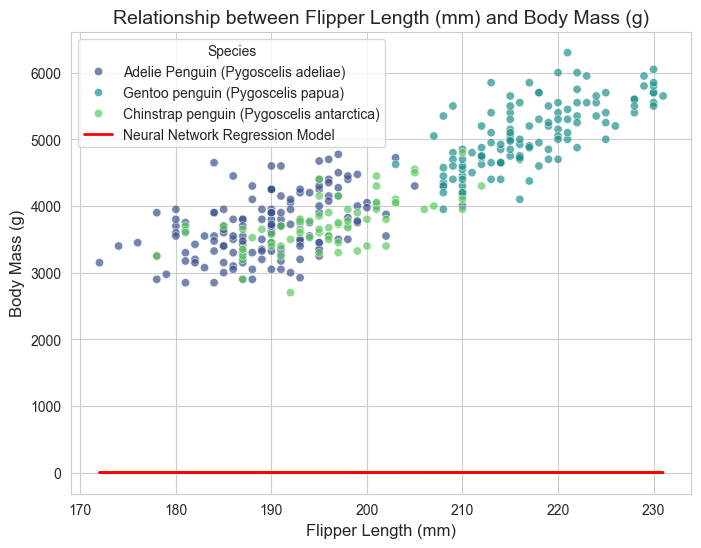

In [10]:
# رسم نمودار پراکندگی با رنگ‌بندی بر اساس گونه پنگوئن
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.flatten(), y=y, hue=penguins_non_missing["Species"], alpha=0.7, palette="viridis")

# رسم خط رگرسیون
plt.plot(X, y_pred, color="red", linewidth=2, label="Neural Network Regression Model")

# تنظیمات نمودار
plt.xlabel("Flipper Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.title("Relationship between Flipper Length (mm) and Body Mass (g)", fontsize=14)
plt.legend(title="Species")
plt.show()